In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Generate datasets
X,y = make_blobs(n_samples=10000, centers=3, n_features=10,random_state=42)

In [3]:
X.shape

(10000, 10)

In [4]:
# Classification Labels
np.unique(y)

array([0, 1, 2])

In [5]:
# Find null
array_sum = np.sum(X)
array_has_nan = np.isnan(array_sum)

print(array_has_nan)

False


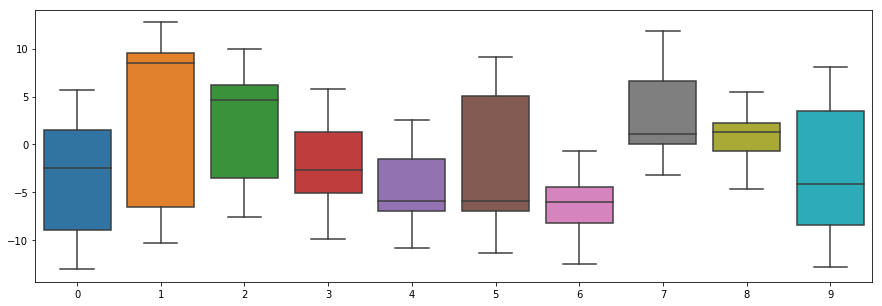

In [6]:
# Detect Outlier
plt.figure(figsize = (15,5))
sns.boxplot(data=X)
plt.show()

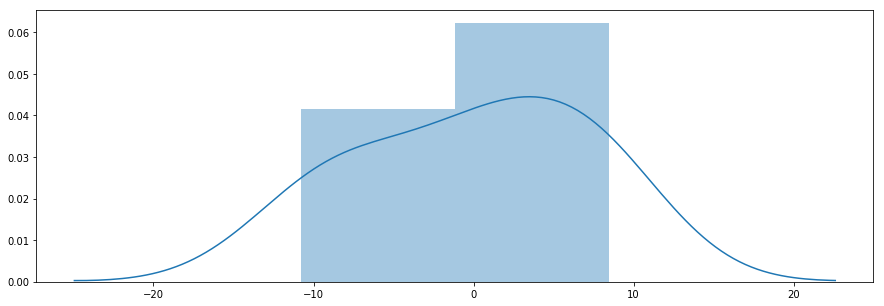

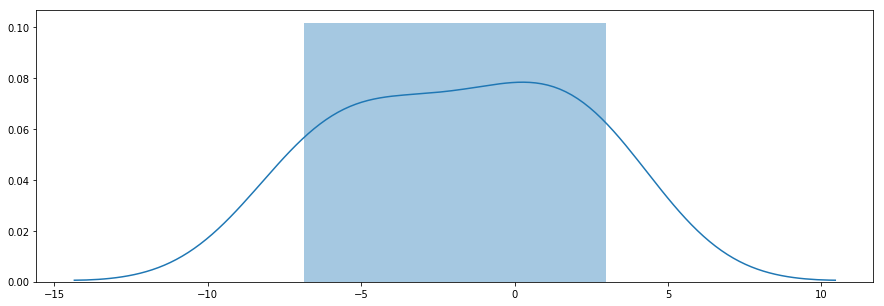

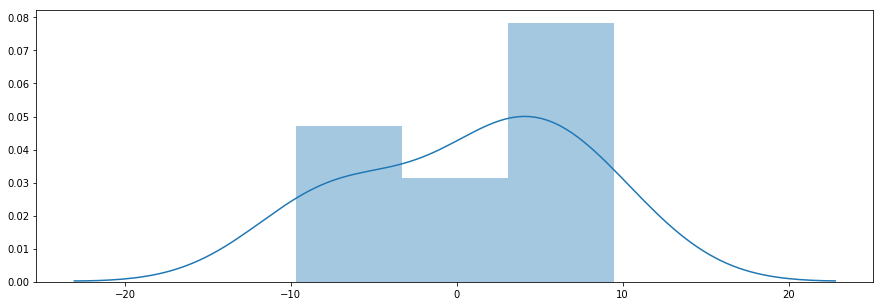

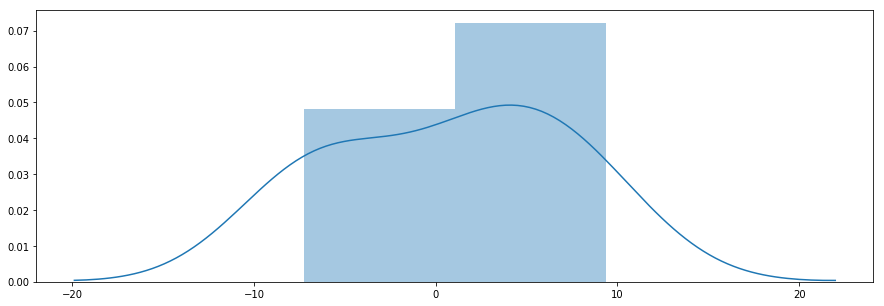

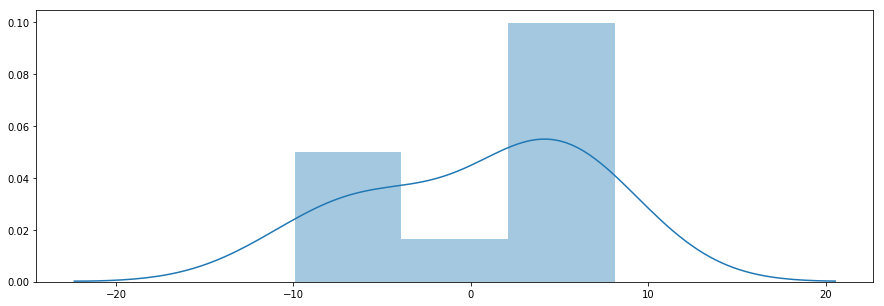

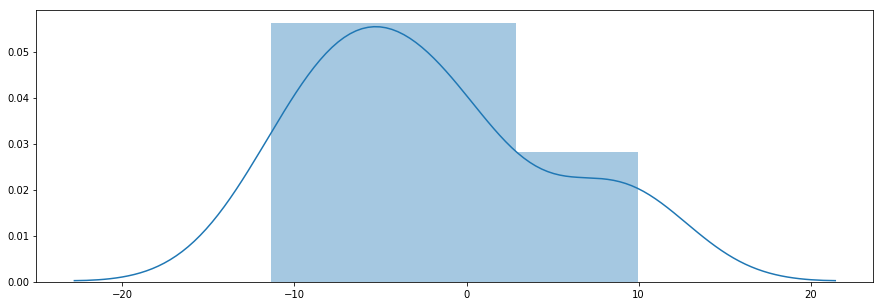

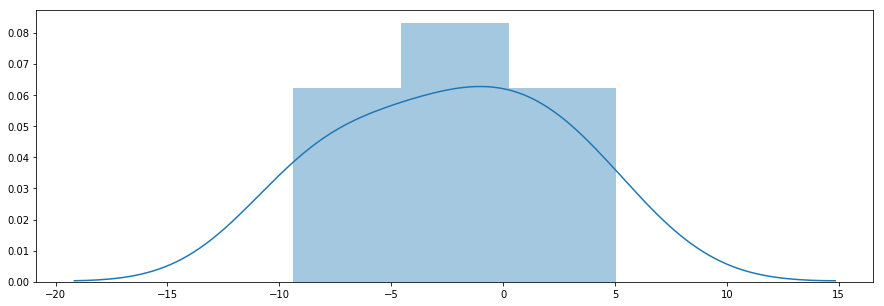

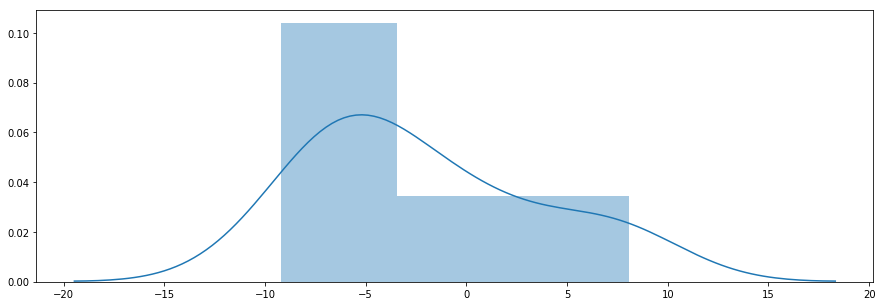

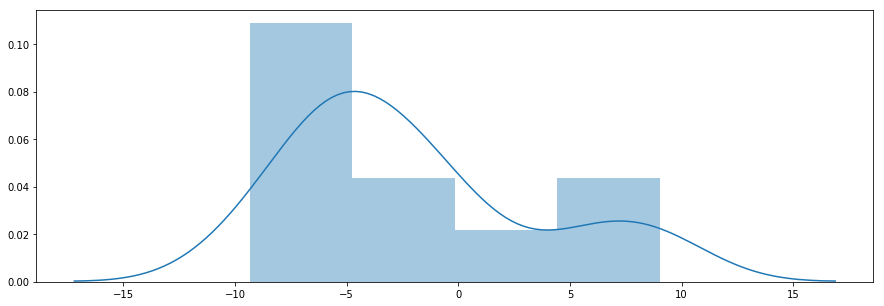

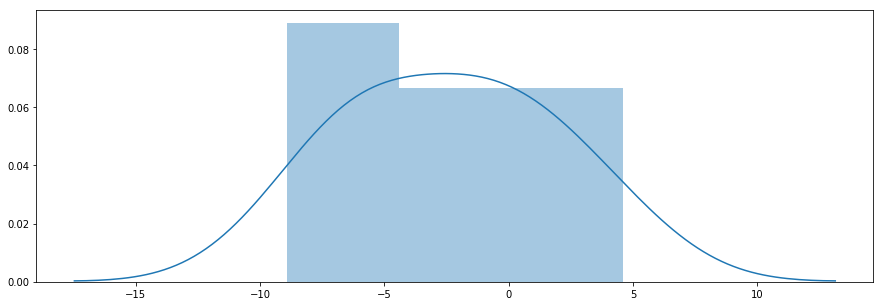

In [7]:
# Check Distribution
for i in [0,1,2,3,4,5,6,7,8,9]:
    plt.figure(figsize = (15,5))
    sns.distplot(X[i])
    plt.show()
    i = i+1

In [8]:
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [10]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

1.0


C:\Users\Bhuvana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bhuvana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [11]:
# Create Pipeline with steps defined
estimator = [('dimRed', PCA()), ('scaler', StandardScaler()), ('trans', PowerTransformer()),
             ('logReg', LogisticRegression(solver='lbfgs', multi_class='auto'))]
pipeline = Pipeline(estimator)

In [12]:
# Cross Validation
param_grid = {
    'dimRed__n_components': [5, 3, 4, 7],
    'logReg':[SVC(), LogisticRegression(solver='lbfgs', multi_class='ovr')], 'logReg__C':[0.001,0.1,10,100,10e5]
}
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5)


In [ ]:
grid.fit(X_train, y_train)
print ("score = %3.2f" %grid.score(X_test,y_test))

print (grid.best_params_)

In [13]:
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

1.0